## 0.2. Loading Data

In [1]:
# CPC SPP

# <font color='blue'> Predições das Lojas ROSSMANN </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximos Passos


# <font color='blue'> 1. Contexto </font>

- Reunião Mensal de Resultados
- CFO pediu uma previsão de Vendas das Próximas 6 semanas de cada Loja

# <font color='blue'> 2. Desafio </font>

# Problema
- Definição do Budget para a Reforma das Lojas

# Causas
- Predição de Vendas Atual apresenta muita divergência.
- O processo de Predição de Vendas é baseado em Experiências Passadas.
- Toda a Previsão de Vendas é feita manualmente pelas 1115 Lojas da Rossmann.
- A visualização das Vendas é Limitada ao Computador.

# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas.
- Visualização das Predições de Vendas vão ser realizadas por um Smartphone.

# <font color='blue'> 3. Desenvolvimento da Solução </font>

# DESCRIÇÃO DOS DADOS

In [5]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## Descriptive Statistics

In [13]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatene
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = [ 'attributes', 'min' , 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] 


In [14]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipoteses

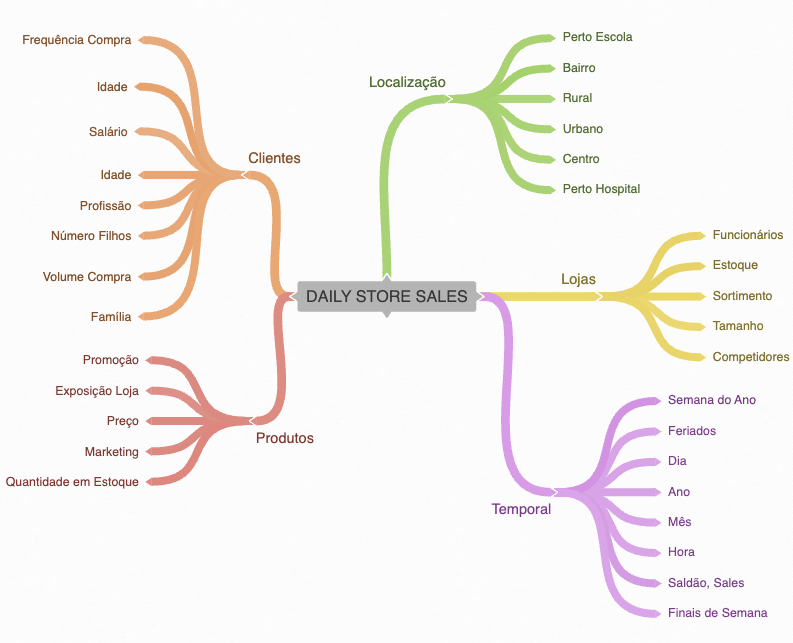

In [20]:
Image( 'MindMapHypotesis.png' )

# Hipoteses da Análise Exploratória

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveria vender menos durante os feriados escolares.


# ANÁLISE EXPLORATÓRIA DOS DADOS

# Response Variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

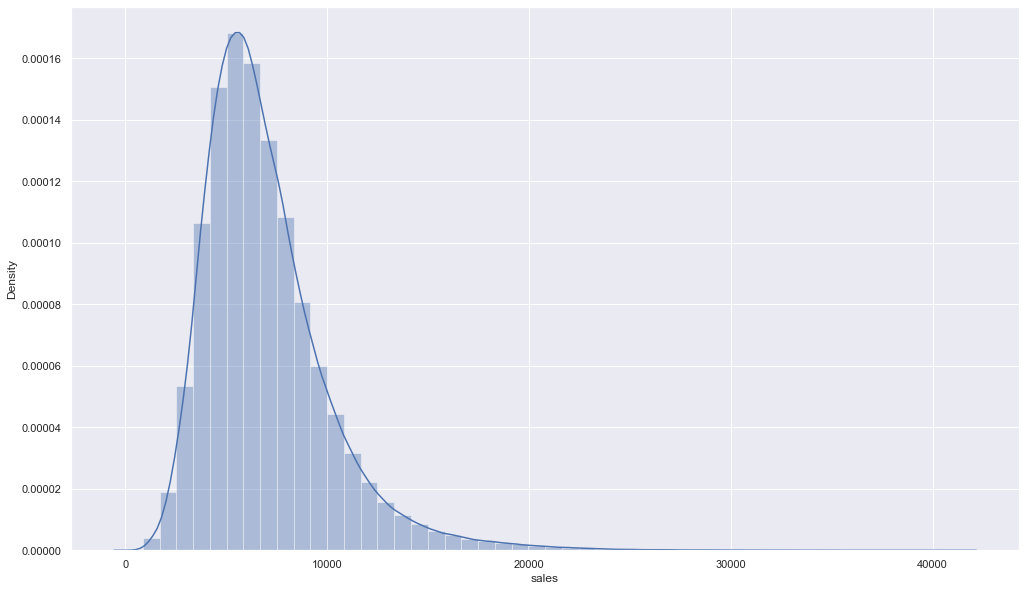

In [122]:
sns.distplot( df4['sales'])

# Numerical Variable

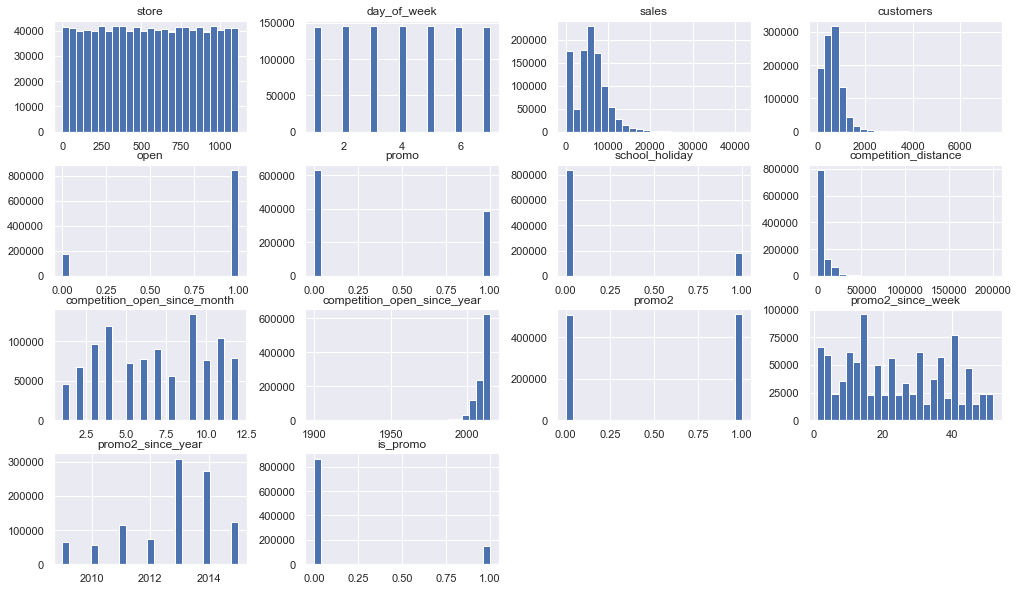

In [123]:
num_attributes.hist(bins=25); 

# Categorical Variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

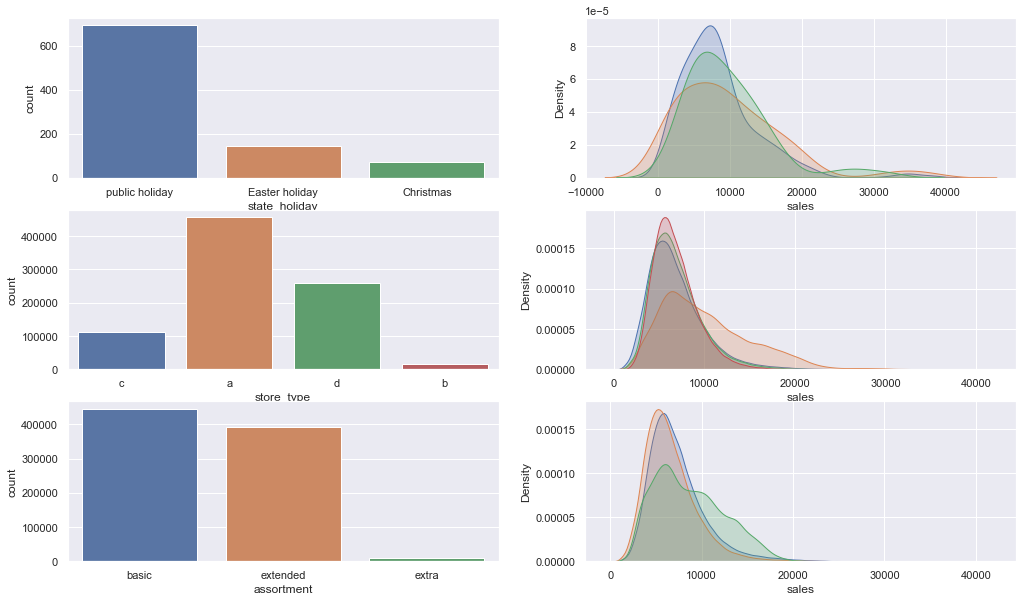

In [125]:
# state_holiday
plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( a['state_holiday'])

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'Easter holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'Christmas']['sales'], label='christmas', shade=True )

# store_type
plt.subplot( 3, 2, 3 )
a = df4['store_type']
sns.countplot( df4['store_type'])

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5 )
a = df4['assortment']
sns.countplot( df4['assortment'])

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'],  shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'],  shade=True )

# Validação das Hipóteses

### **H1. Lojas com maior sortimento deveriam vender mais.**

**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.


<AxesSubplot:xlabel='year_week'>

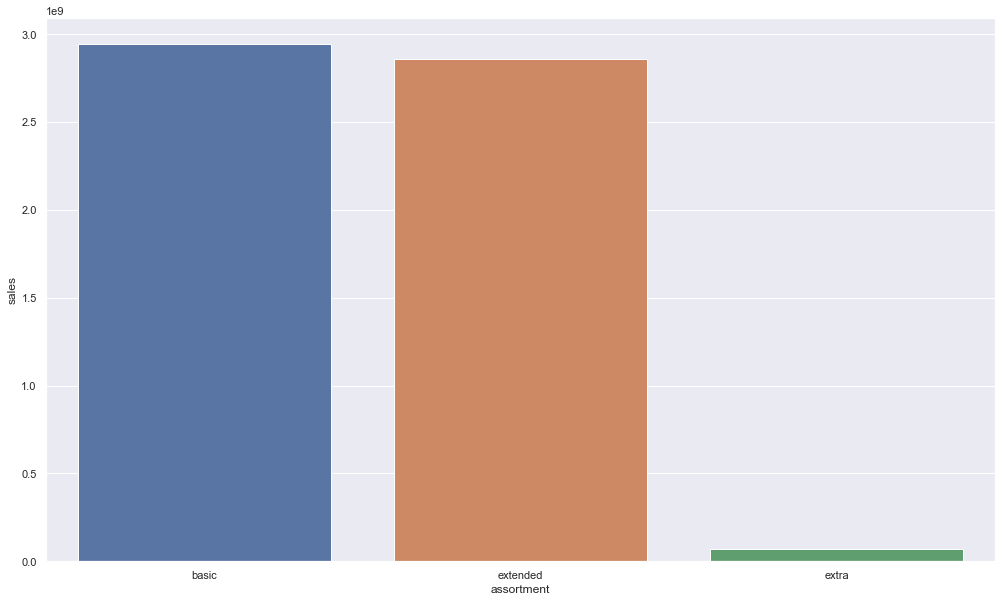

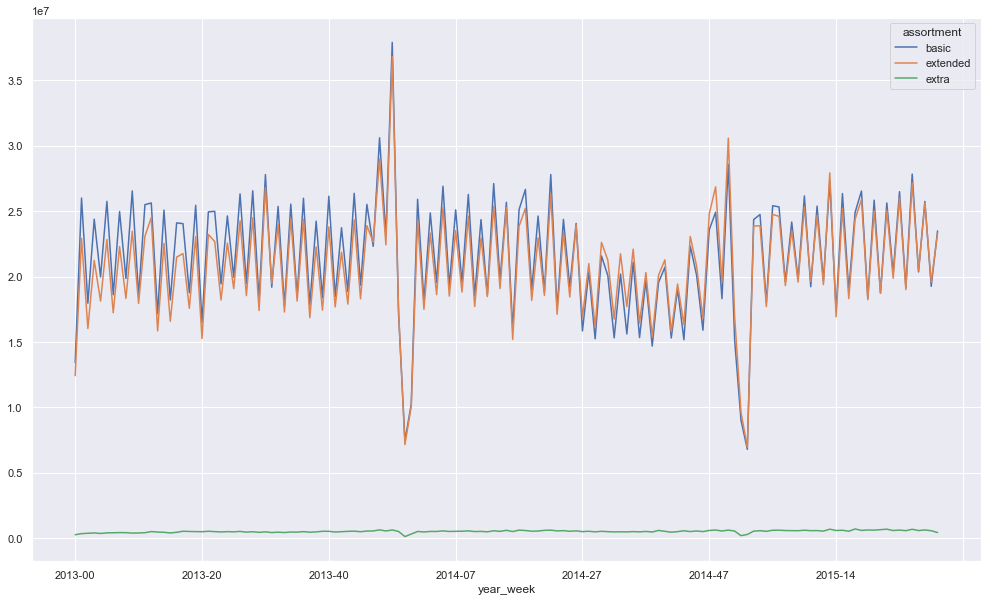

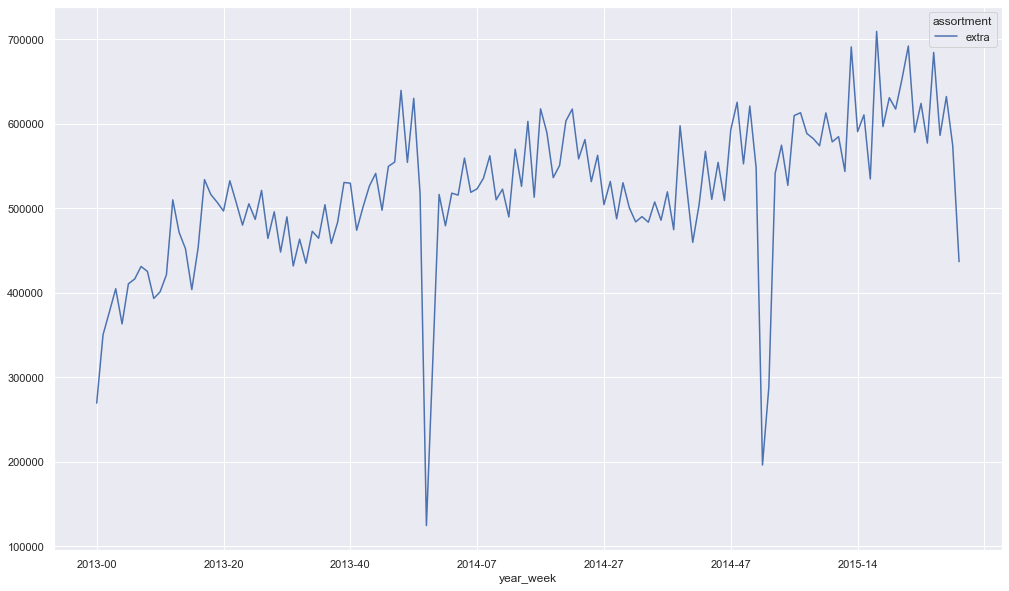

In [126]:
aux1 = df4[['assortment' , 'sales']].groupby('assortment').sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1); 

aux2 = df4[['year_week', 'assortment' , 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2[ aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales').plot()



### **H2. Lojas com competidores mais próximos deveriam vender menos.**
**FALSA** Lojas com competidores mais próximos vendem mais.



(Ajuste de dados, ele agrupa os dados em grupos de 1000 em 1000 para uma melhor visualizacao dos dados em um grafico de barras)

A correlacao existe entre -1 e 1, e quanto mais próximo de um ou de outro melhor eh essa correlação
No caso desses dados, como o valor da correlação é -0,23 indica que quanto mais distante eh a loja dos seus competidores, menor as vendas, o que se demonstra contrário ao que seria lógico no ponto inicial de observação dos dados.
( Se o valor da correlação estivesse mais proximo de 1, então quanto maior a distância entre os concorrentes, melhores seriam as vendas das lojass, o que seriam mais lógico, pois existiria menos competição)

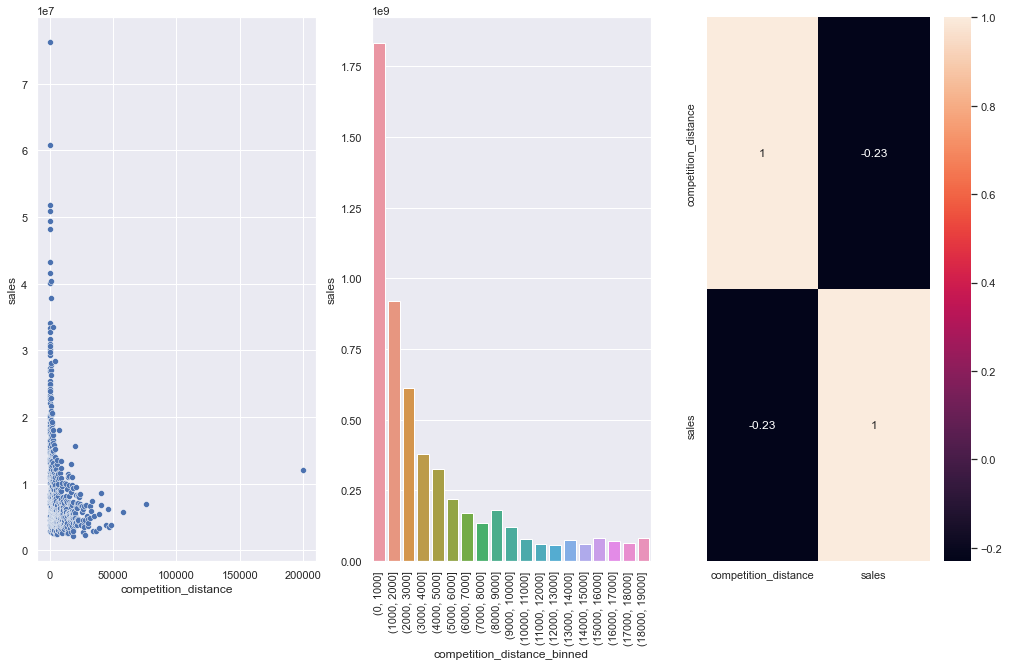

In [127]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x= 'competition_distance', y='sales', data=aux1 )


plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 ); 

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson'), annot=True); 


### **H10.** **Lojas deveriam vender mais depois do dia 10 de cada mês.**

**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mes.

# Resumo das Hipóteses

In [45]:
tab = [['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'], 
['H2', 'Falsa', 'Media'], 
['H3', 'Falsa', 'Media'], 
['H4', 'Falsa', 'Baixa'], 
['H5', '-', '-'],
['H6', 'Falsa', 'Baixa'], 
['H7', 'Falsa', 'Media'], 
['H8', 'Falsa', 'Alta'],
['H9', 'Falsa', 'Alta'],
['H10', 'Verdadeira', 'Alta'], 
['H11', 'Verdadeira', 'Alta'], 
['H12', 'Verdadeira', 'Baixa']] 
print( tabulate( tab, headers='firstrow'))

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


# Análise Multivariada

# Numerical Attributes

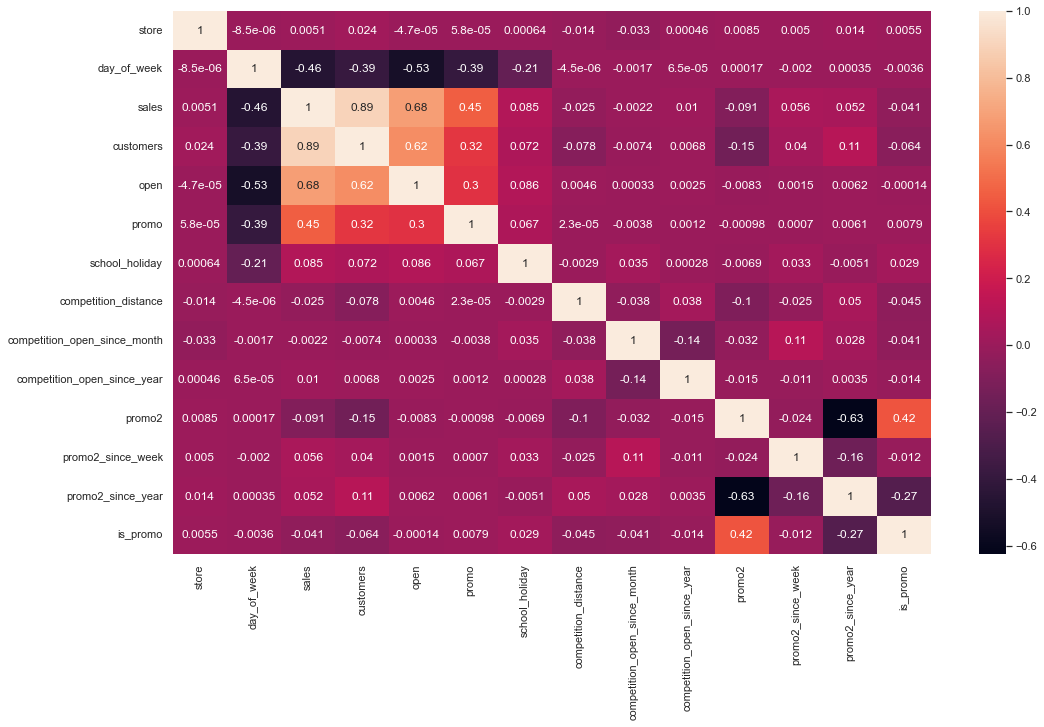

In [138]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

# Categorical Attributes

<AxesSubplot:>

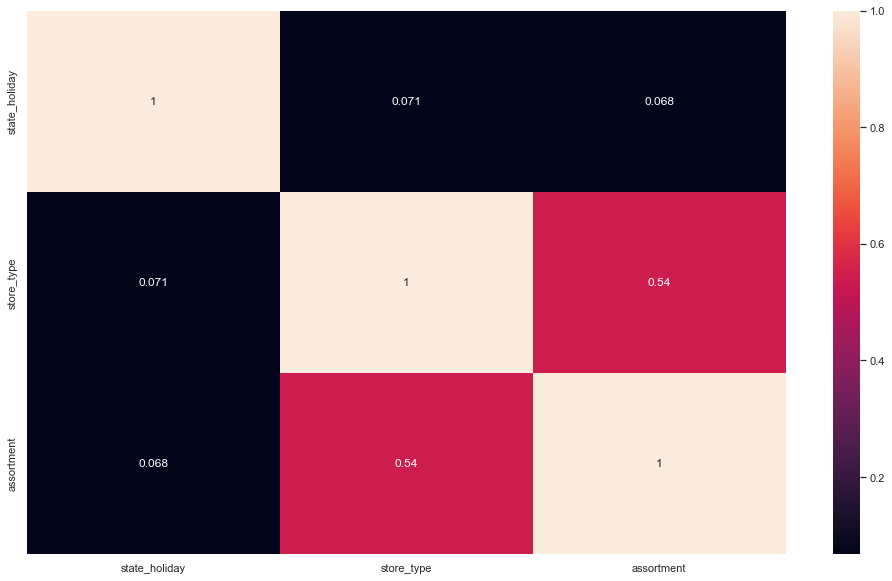

In [139]:
# only categorical data
a = df4.select_dtypes( include='object' ) 

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3],
               'store_type': [a4, a5, a6],
               'assortment': [a7, a8, a9] })

d = d.set_index( d.columns )
sns.heatmap( d, annot=True )

#  MACHINE LEARNING MODELLING

##  Compare Model's Performance

In [316]:
modelling_result_cv = pd.concat( [ lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv ] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.8 +/- 296.56,0.3 +/- 0.02,2953.15 +/- 468.99
0,Lasso,2115.89 +/- 341.4,0.29 +/- 0.01,3056.97 +/- 504.51
0,Random Forest,841.86 +/- 221.1,0.12 +/- 0.02,1261.16 +/- 316.28
0,XBGooster Regressor,1029.56 +/- 183.99,0.14 +/- 0.02,1485.04 +/- 262.49


# <font color='blue'> 4. Conclusão & Demonstração </font>

# TRADUÇÃO E INTERPRETAÇÃO DO ERRO

# Business Performance

In [112]:
df92.sort_values( 'MAPE', ascending=False ).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,105028.453125,101730.276419,108326.629831,3298.176706,0.544053
908,909,229375.125000,221574.705566,237175.544434,7800.419434,0.519917
875,876,206166.406250,202181.468867,210151.343633,3984.937383,0.305917
594,595,369952.906250,365648.579497,374257.233003,4304.326753,0.293733
721,722,344922.656250,343148.962983,346696.349517,1773.693267,0.240981


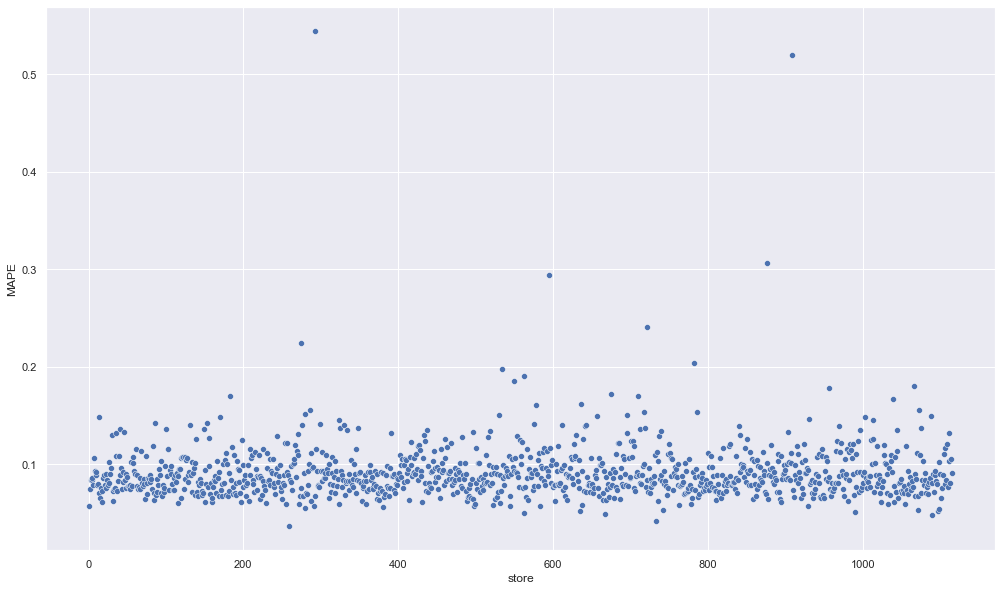

In [142]:
sns.scatterplot( x='store', y='MAPE', data=df92);

# Total Performance

In [114]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'Index': 'Scenario', 0:'Values'} )
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

,index,Values
0,predictions,"R$283,901,824.00"
1,worst_scenario,"R$283,198,749.24"
2,best_scenario,"R$284,604,871.47"


# Machine Learning Performance

<AxesSubplot:xlabel='predictions', ylabel='error'>

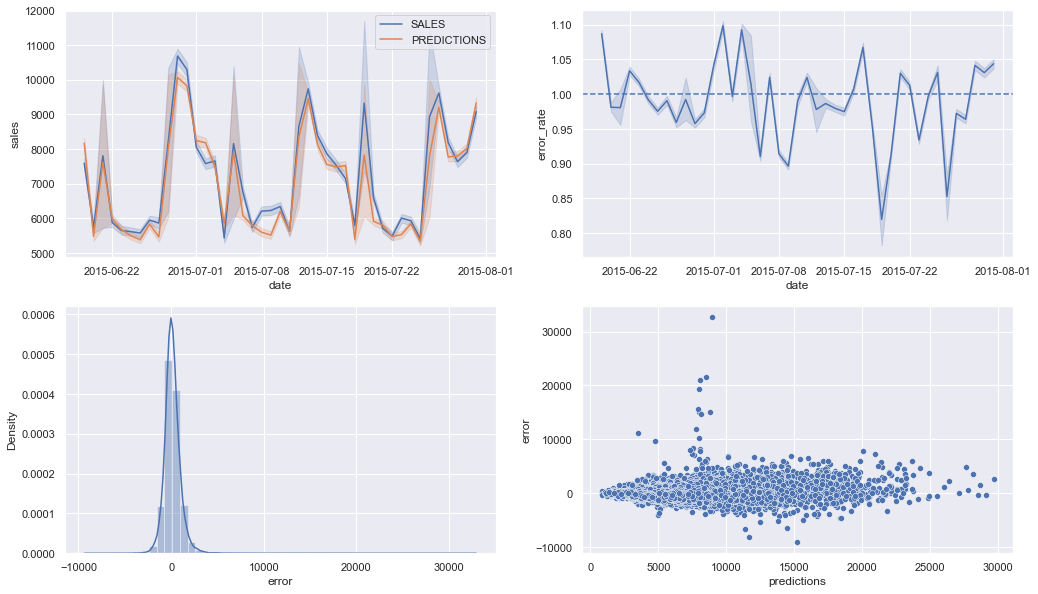

In [143]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='sales', data=df9, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='error_rate', data=df9 )
plt.axhline( 1, linestyle='--')

plt.subplot( 2, 2, 3 )
sns.distplot( df9['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( df9['predictions'], df9['error'] )

# <font color='blue'> 5. Próximos Passos </font>

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Utilização
- Aumentar em 10% a Eficiência do Modelo

# <font color='blue'> Q & A </font>

# <font color='blue'> Muito Obrigado !</font>